# Implémenter l'algorithme kmean par nous même

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [16]:
df = make_blobs(n_samples=300, n_features=2)
df

(array([[-4.50225567e+00, -1.98870432e+00],
        [ 7.00746080e-02, -2.56887899e+00],
        [ 4.14613838e-01, -3.63871589e+00],
        [ 1.05594337e+00, -3.65637652e+00],
        [-3.66896985e+00, -1.67656272e+00],
        [ 6.61042661e-01, -1.17230691e+00],
        [-7.33600775e+00, -1.35732775e+00],
        [-2.43546100e+00, -2.65014855e+00],
        [ 1.10732179e-01, -2.82853611e+00],
        [-5.03139032e+00, -5.20967546e-01],
        [-8.18499840e-01, -3.07014235e+00],
        [ 1.30852143e+00, -1.33970091e+00],
        [-2.49531023e+00, -9.35702665e-01],
        [-4.99250402e+00, -2.71279722e+00],
        [ 1.64414745e+00, -4.37595511e+00],
        [ 5.38857507e+00, -3.15602235e+00],
        [ 1.82342873e+00, -2.47315305e+00],
        [-2.98363345e+00,  1.53299583e-01],
        [-3.76670502e+00,  1.26371965e+00],
        [ 1.14938415e+00, -1.32706238e+00],
        [ 2.52092746e+00, -2.65341248e+00],
        [-2.57520047e+00, -1.34511579e+00],
        [-3.81001736e+00, -1.436

In [17]:
df[0] #valeurs

array([[-4.50225567e+00, -1.98870432e+00],
       [ 7.00746080e-02, -2.56887899e+00],
       [ 4.14613838e-01, -3.63871589e+00],
       [ 1.05594337e+00, -3.65637652e+00],
       [-3.66896985e+00, -1.67656272e+00],
       [ 6.61042661e-01, -1.17230691e+00],
       [-7.33600775e+00, -1.35732775e+00],
       [-2.43546100e+00, -2.65014855e+00],
       [ 1.10732179e-01, -2.82853611e+00],
       [-5.03139032e+00, -5.20967546e-01],
       [-8.18499840e-01, -3.07014235e+00],
       [ 1.30852143e+00, -1.33970091e+00],
       [-2.49531023e+00, -9.35702665e-01],
       [-4.99250402e+00, -2.71279722e+00],
       [ 1.64414745e+00, -4.37595511e+00],
       [ 5.38857507e+00, -3.15602235e+00],
       [ 1.82342873e+00, -2.47315305e+00],
       [-2.98363345e+00,  1.53299583e-01],
       [-3.76670502e+00,  1.26371965e+00],
       [ 1.14938415e+00, -1.32706238e+00],
       [ 2.52092746e+00, -2.65341248e+00],
       [-2.57520047e+00, -1.34511579e+00],
       [-3.81001736e+00, -1.43650325e+00],
       [-5.

In [18]:
df[1] #cluster

array([2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 2, 2, 1, 0, 1,
       2, 2, 1, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 1, 2, 0, 2, 2, 1,
       2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2,
       2, 0, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 1, 2, 0,
       2, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 1,
       2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2,
       0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0,
       2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       1, 2, 0, 0, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2])

In [19]:
df = pd.DataFrame(
    {
        'feature0' : df[0][:,0],
        'feature1' : df[0][:, 1],
        'cluster_initial' : df[1]
    }
)
df

,feature0,feature1,cluster_initial
0,-4.502256,-1.988704,2
1,0.070075,-2.568879,1
2,0.414614,-3.638716,1
3,1.055943,-3.656377,1
4,-3.668970,-1.676563,2
...,...,...,...
295,0.339724,-2.885020,1
296,1.991373,-1.892050,0
297,-3.865464,-0.516506,2
298,-4.038295,-1.392006,2


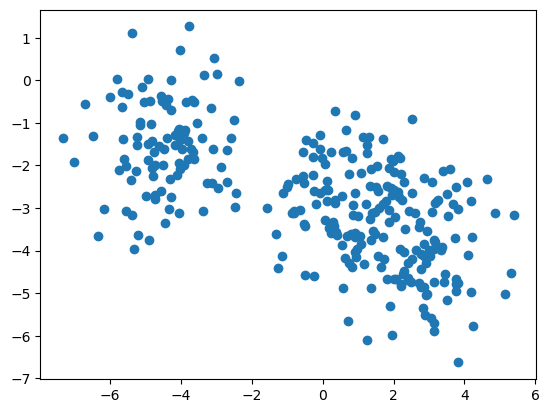

In [20]:
fig, ax = plt.subplots()
x=df['feature0']
y=df['feature1']
plt.scatter(x=x, y=y)
plt.show()

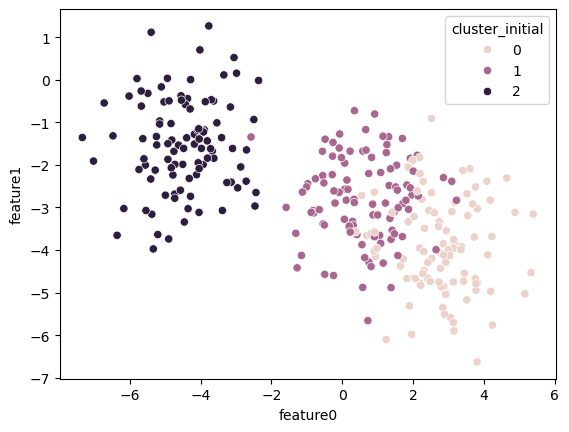

In [21]:
import seaborn as sns

sns.scatterplot(x=df['feature0'], y=df['feature1'], hue=df['cluster_initial'])
plt.show()

In [22]:
#étape 1 : choisir trois centroides, vecteurs [f0, f1]

#centroide 0 : 
index_c0 = np.random.choice(a=df.index.values, size=1)
c0 = df.iloc[index_c0, :]
print('\ncentroide 0\n', c0)


#centroide 1 : 
index_c1 = np.random.choice(a=df.index.values, size=1)
c1 = df.iloc[index_c1, :]
print('\ncentroide 1\n', c1)



#centroide 2 : 
index_c2 = np.random.choice(a=df.index.values, size=1)
c2 = df.iloc[index_c2, :]
print('\ncentroide 2\n', c2)


centroide 0
      feature0  feature1  cluster_initial
298 -4.038295 -1.392006                2

centroide 1
     feature0  feature1  cluster_initial
70  2.517586 -0.911703                0

centroide 2
     feature0  feature1  cluster_initial
96    0.9039 -4.025309                0


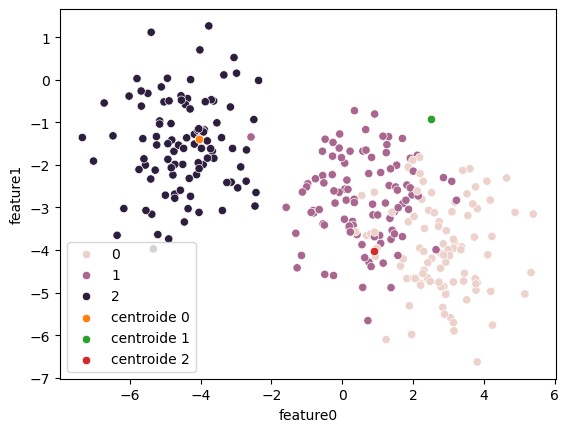

In [23]:
import seaborn as sns

sns.scatterplot(x=df['feature0'], y=df['feature1'], hue=df['cluster_initial'])
sns.scatterplot(x=c0['feature0'], y=c0['feature1'], label='centroide 0')

sns.scatterplot(x=c1['feature0'], y=c1['feature1'], label='centroide 1')

sns.scatterplot(x=c2['feature0'], y=c2['feature1'], label='centroide 2')

plt.show()

In [24]:
df

,feature0,feature1,cluster_initial
0,-4.502256,-1.988704,2
1,0.070075,-2.568879,1
2,0.414614,-3.638716,1
3,1.055943,-3.656377,1
4,-3.668970,-1.676563,2
...,...,...,...
295,0.339724,-2.885020,1
296,1.991373,-1.892050,0
297,-3.865464,-0.516506,2
298,-4.038295,-1.392006,2


In [25]:

df_update=df.copy()

#Distance avec c_0
df_update["feature_0_distance_c0"] = (((df['feature0']-c0['feature0'].values))**2 +  ((df['feature1']-c0['feature1'].values)**2))**(1/2) 

#Distance avec c_1
df_update["feature_0_distance_c1"] = (((df['feature0']-c1['feature0'].values))**2 +  ((df['feature1']-c1['feature1'].values)**2))**(1/2) 

#Distance avec c_2
df_update["feature_0_distance_c2"] = (((df['feature0']-c2['feature0'].values))**2 +  ((df['feature1']-c2['feature1'].values)**2))**(1/2) 

                                        
df_update

,feature0,feature1,cluster_initial,feature_0_distance_c0,feature_0_distance_c1,feature_0_distance_c2
0,-4.502256,-1.988704,2,0.755849,7.101979,5.777047
1,0.070075,-2.568879,1,4.273609,2.955764,1.678229
2,0.414614,-3.638716,1,4.987595,3.443703,0.623582
3,1.055943,-3.656377,1,5.574822,3.109603,0.399034
4,-3.668970,-1.676563,2,0.466234,6.233657,5.140792
...,...,...,...,...,...,...
295,0.339724,-2.885020,1,4.625597,2.938888,1.272223
296,1.991373,-1.892050,0,6.050367,1.112646,2.394449
297,-3.865464,-0.516506,2,0.892396,6.395272,5.921024
298,-4.038295,-1.392006,2,0.000000,6.573452,5.599962


In [26]:
#assigner les clusters temporaires en fonction de la valeur de distance

conditions=[(df_update['feature_0_distance_c0']<=df_update['feature_0_distance_c1'])&(df_update['feature_0_distance_c0']<=df_update['feature_0_distance_c2']),   
            (df_update['feature_0_distance_c1']<=df_update['feature_0_distance_c0'])&(df_update['feature_0_distance_c1']<=df_update['feature_0_distance_c2']),  
            (df_update['feature_0_distance_c2']<=df_update['feature_0_distance_c0'])&(df_update['feature_0_distance_c2']<=df_update['feature_0_distance_c1'] ) 
            ]  
choices=['c0', 'c1', 'c2']  
df_temp=df_update.copy()
df_temp['cluster_round1']=np.select(conditions, choices, np.nan).astype(str)  
df_temp


,feature0,feature1,cluster_initial,feature_0_distance_c0,feature_0_distance_c1,feature_0_distance_c2,cluster_round1
0,-4.502256,-1.988704,2,0.755849,7.101979,5.777047,c0
1,0.070075,-2.568879,1,4.273609,2.955764,1.678229,c2
2,0.414614,-3.638716,1,4.987595,3.443703,0.623582,c2
3,1.055943,-3.656377,1,5.574822,3.109603,0.399034,c2
4,-3.668970,-1.676563,2,0.466234,6.233657,5.140792,c0
...,...,...,...,...,...,...,...
295,0.339724,-2.885020,1,4.625597,2.938888,1.272223,c2
296,1.991373,-1.892050,0,6.050367,1.112646,2.394449,c1
297,-3.865464,-0.516506,2,0.892396,6.395272,5.921024,c0
298,-4.038295,-1.392006,2,0.000000,6.573452,5.599962,c0


In [27]:
df_temp.groupby(by='cluster_round1').mean()

,feature0,feature1,cluster_initial,feature_0_distance_c0,feature_0_distance_c1,feature_0_distance_c2
cluster_round1,,,,,,
c0,-4.433250,-1.518018,1.990099,1.348132,7.059310,5.996624
c1,2.386208,-2.176067,0.479167,6.497692,1.832229,2.719889
c2,1.484951,-3.749104,0.503311,6.057789,3.423856,1.723314


In [38]:
df_new_centroides = df_temp.groupby(by='cluster_round1').mean().loc[:, ['feature0', 'feature1']].reset_index()
df_new_centroides


,cluster_round1,feature0,feature1
0,c0,-4.433250,-1.518018
1,c1,2.386208,-2.176067
2,c2,1.484951,-3.749104


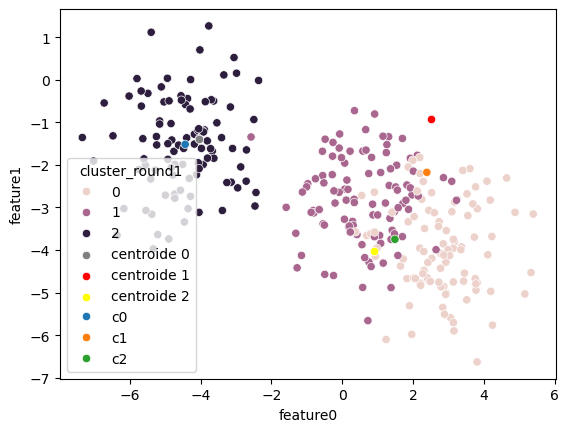

In [39]:
import seaborn as sns

sns.scatterplot(x=df['feature0'], y=df['feature1'], hue=df['cluster_initial'])
sns.scatterplot(x=c0['feature0'], y=c0['feature1'], label='centroide 0', color='grey')

sns.scatterplot(x=c1['feature0'], y=c1['feature1'], label='centroide 1', color='red')

sns.scatterplot(x=c2['feature0'], y=c2['feature1'], label='centroide 2', color="yellow")

sns.scatterplot(data=df_new_centroides,
                x='feature0',
                y='feature1',
                hue='cluster_round1')

plt.show()


centroide 0
   cluster_round1  feature0  feature1
0             c0  -4.43325 -1.518018

centroide 1
   cluster_round1  feature0  feature1
1             c1  2.386208 -2.176067

centroide 2
   cluster_round1  feature0  feature1
2             c2  1.484951 -3.749104


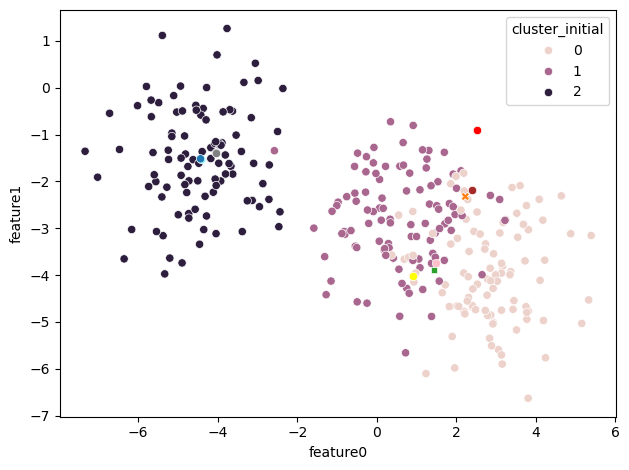

In [62]:
#étape 3 : changer les trois centroides, vecteurs [f0, f1]

#centroide 0 : 
c0_round2 = df_new_centroides.loc[df_new_centroides['cluster_round1']=='c0', :]
print('\ncentroide 0\n', c0_round2)


#centroide 1 : 
c1_round2 = df_new_centroides.loc[df_new_centroides['cluster_round1']=='c1', :]
print('\ncentroide 1\n', c1_round2)



#centroide 2 : 
c2_round2 = df_new_centroides.loc[df_new_centroides['cluster_round1']=='c2', :]
print('\ncentroide 2\n', c2_round2)



df_update_round2=df.copy()

#Distance avec c_0
df_update_round2["feature_0_distance_c0"] = (((df['feature0']-c0_round2['feature0'].values))**2 +  ((df['feature1']-c0_round2['feature1'].values)**2))**(1/2) 

#Distance avec c_1
df_update_round2["feature_0_distance_c1"] = (((df['feature0']-c1_round2['feature0'].values))**2 +  ((df['feature1']-c1_round2['feature1'].values)**2))**(1/2) 

#Distance avec c_2
df_update_round2["feature_0_distance_c2"] = (((df['feature0']-c2_round2['feature0'].values))**2 +  ((df['feature1']-c2_round2['feature1'].values)**2))**(1/2) 

                                        
df_update_round2

#assigner les clusters temporaires en fonction de la valeur de distance

conditions=[(df_update_round2['feature_0_distance_c0']<=df_update_round2['feature_0_distance_c1'])&(df_update_round2['feature_0_distance_c0']<=df_update_round2['feature_0_distance_c2']),   
            (df_update_round2['feature_0_distance_c1']<=df_update_round2['feature_0_distance_c0'])&(df_update_round2['feature_0_distance_c1']<=df_update_round2['feature_0_distance_c2']),  
            (df_update_round2['feature_0_distance_c2']<=df_update_round2['feature_0_distance_c0'])&(df_update_round2['feature_0_distance_c2']<=df_update_round2['feature_0_distance_c1'] ) 
            ]  
choices=['c0', 'c1', 'c2']  
df_temp_round2=df_update_round2.copy()
df_temp_round2['cluster_round2']=np.select(conditions, choices, np.nan).astype(str)  
df_temp_round2

df_new_centroides_round2 = df_temp_round2.groupby(by='cluster_round2').mean().loc[:, ['feature0', 'feature1']].reset_index()

sns.scatterplot(x=df['feature0'], y=df['feature1'], hue=df['cluster_initial'])

sns.scatterplot(x=c0['feature0'], y=c0['feature1'], label='centroide 0', color='grey', 
                legend=None)
sns.scatterplot(x=c1['feature0'], y=c1['feature1'], label='centroide 1', color='red', 
                legend=None)
sns.scatterplot(x=c2['feature0'], y=c2['feature1'], label='centroide 2', color="yellow", 
                legend=None)

sns.scatterplot(x=c0_round2['feature0'], y=c0_round2['feature1'], label='centroide 0 (round1)', color='cyan', 
                legend=None)
sns.scatterplot(x=c1_round2['feature0'], y=c1_round2['feature1'], label='centroide 1 (round1)', color='brown', 
                legend=None)
sns.scatterplot(x=c2_round2['feature0'], y=c2_round2['feature1'], label='centroide 2 (round 1)', color="pink", 
                legend=None)

sns.scatterplot(data=df_new_centroides_round2,
                x='feature0',
                y='feature1',
                hue='cluster_round2', 
                style='cluster_round2', 
                legend=None)
plt.tight_layout()

plt.show()

In [57]:
c0_round2

,cluster_round1,feature0,feature1
0,c0,-4.43325,-1.518018


In [ ]:
#boucle for : max_iter < seuil
#distance entre 2 centroides successifs < seuil